In [1]:
# Importation of Essential Libraries

import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualizations
import sklearn  # For machine learning (classification & clustering)
import statsmodels.api as sm  # For statistical analysis
from prophet import Prophet  # For time series forecasting

print("Essential libraries imported successfully!")


Essential libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('Online Retail.csv')

print("Dataset loaded successfully!")



Dataset loaded successfully!


In [3]:
# Display the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Summary statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
# Check for blank spaces in categorical columns
blank_values = df.apply(lambda x: (x.astype(str).str.strip() == "").sum())
print("\nBlank Values per Column:")
print(blank_values)


Blank Values per Column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
# Check for unique values in categorical columns to detect anomalies
print("\nUnique Values in Each Column:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
InvoiceNo: 25900 unique values
StockCode: 4070 unique values
Description: 4223 unique values
InvoiceDate: 23260 unique values
Country: 38 unique values


In [9]:
# Check for negative values in numerical columns
negative_values = df.select_dtypes(include=['number']).lt(0).sum()
print("\nNegative Values per Column:")
print(negative_values)


Negative Values per Column:
Quantity      10624
UnitPrice         2
CustomerID        0
dtype: int64


In [10]:
# Check for zero values in numerical columns (excluding Quantity since zero might be valid)
zero_values = (df == 0).sum()
print("\nZero Values per Column:")
print(zero_values)


Zero Values per Column:
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice      2515
CustomerID        0
Country           0
dtype: int64


In [11]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")



Number of Duplicate Rows: 5268


In [12]:
# Check for anomalies in Country
print("\nUnique Countries in Dataset:")
print(df['Country'].unique())


Unique Countries in Dataset:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [13]:
# ============================================
# DATA CLEANING AND VALID DUPLICATES CHECK
# ============================================

import pandas as pd

# ==============================
# 1. HANDLE DUPLICATES CHECK
# ==============================

columns_to_check = ["InvoiceNo", "StockCode", "Description", "CustomerID"]  

# Dictionary to store duplicate counts
valid_duplicate_counts = {}

# Loop through selected columns and count duplicate values
for col in columns_to_check:
    valid_duplicate_counts[col] = df[df.duplicated(subset=[col], keep=False)][col].nunique()

# Convert results to DataFrame
valid_duplicate_summary = pd.DataFrame(valid_duplicate_counts.items(), columns=['Column', 'Unique Duplicate Values'])

print("\nValid Duplicate Count per Column:")
print(valid_duplicate_summary.sort_values(by="Unique Duplicate Values", ascending=False))

# ==============================
# 2. HANDLE MISSING VALUES
# ==============================

# Replace missing or blank descriptions with "Unknown"
df["Description"] = df["Description"].fillna("Unknown").replace("?", "Unknown")

# Identify missing CustomerIDs
missing_customer_ids = df["CustomerID"].isna()

# Assign unique negative IDs to missing CustomerIDs
df.loc[missing_customer_ids, "CustomerID"] = range(-1, -1 - missing_customer_ids.sum(), -1)
df["CustomerID"] = df["CustomerID"].astype(int)  

# ==============================
# 3. HANDLE INVALID DATA
# ==============================

# Remove rows where Quantity is negative
df = df[df["Quantity"] > 0]

# Remove rows where UnitPrice is zero or negative
df = df[df["UnitPrice"] > 0]

# ==============================
# 4. HANDLE DUPLICATES
# ==============================

# Drop fully duplicated rows
df = df.drop_duplicates()

# ==============================
# 5. HANDLE TEXT INCONSISTENCIES
# ==============================

# Standardize Country names (remove "Unspecified" rows)
df = df[df["Country"] != "Unspecified"]

# Normalize text in Description (strip spaces, lowercase)
df["Description"] = df["Description"].str.strip().str.lower()

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

print("✅ Data cleaning completed successfully!")



Valid Duplicate Count per Column:
        Column  Unique Duplicate Values
0    InvoiceNo                    20059
3   CustomerID                     4293
2  Description                     3915
1    StockCode                     3837
✅ Data cleaning completed successfully!


In [14]:
# Proper cleaning of description column

import re

# Use regex to remove any occurrences of "?" anywhere in the text
df["Description"] = df["Description"].apply(lambda x: re.sub(r"\?+", "", x).strip())

# Fill missing descriptions with "Unknown"
df["Description"] = df["Description"].fillna("Unknown")

# Convert all text to lowercase for consistency
df["Description"] = df["Description"].str.lower()

print("Description column cleaned successfully!")


Description column cleaned successfully!


In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [16]:
# ==============================
# EXPLORATORY DATA ANALYSIS
# ==============================

# General overview
print("Dataset Overview:\n")
print(df.info())  # Check data types and missing values

# Summary statistics for numerical columns
print("\nSummary Statistics:\n")
print(df.describe())

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:\n")
print(df.nunique())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524469 entries, 0 to 524468
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524469 non-null  object 
 1   StockCode    524469 non-null  object 
 2   Description  524469 non-null  object 
 3   Quantity     524469 non-null  int64  
 4   InvoiceDate  524469 non-null  object 
 5   UnitPrice    524469 non-null  float64
 6   CustomerID   524469 non-null  int32  
 7   Country      524469 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 30.0+ MB
None

Summary Statistics:

            Quantity      UnitPrice     CustomerID
count  524469.000000  524469.000000  524469.000000
mean       10.618874       3.923529   -5573.851293
std       156.340737      36.106993   40997.578183
min         1.000000       0.001000 -135080.000000
25%         1.000000       1.250000    -911.000000
50%         4.000000       2.080000

In [17]:
# ==============================
# Top Products by Quantity Sold
# ==============================
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Best-Selling Products:\n", top_products)


Top 10 Best-Selling Products:
 Description
paper craft , little birdie           80995
medium ceramic top storage jar        78033
world war 2 gliders asstd designs     54855
jumbo bag red retrospot               48371
white hanging heart t-light holder    37872
popcorn holder                        36746
pack of 72 retrospot cake cases       36359
assorted colour bird ornament         36340
rabbit night light                    30726
mini paint set vintage                26633
Name: Quantity, dtype: int64


In [18]:
# ==============================
# Total Revenue Per Product
# ==============================
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]  # Create a new revenue column
top_revenue_products = df.groupby("Description")["TotalSales"].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Revenue-Generating Products:\n", top_revenue_products)


Top 10 Revenue-Generating Products:
 Description
dotcom postage                        206248.77
regency cakestand 3 tier              174131.04
paper craft , little birdie           168469.60
white hanging heart t-light holder    106236.72
party bunting                          99445.23
jumbo bag red retrospot                94159.81
medium ceramic top storage jar         81700.92
postage                                78101.88
manual                                 77752.82
rabbit night light                     66842.99
Name: TotalSales, dtype: float64


In [19]:
# ==============================
# Customer Purchase Power
# ==============================
customer_purchases = df["CustomerID"].value_counts().head(10)

print("\nTop 10 Customers with Most Transactions:\n", customer_purchases)


Top 10 Customers with Most Transactions:
 CustomerID
17841    7676
14911    5670
14096    5111
12748    4412
14606    2677
15311    2366
14646    2076
13089    1814
13263    1667
14298    1637
Name: count, dtype: int64


In [20]:
# =====================
# Country Metrics
# =====================

# Total Revenue Per Country
country_sales = df.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)

# Number of Transactions Per Country
country_transactions = df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False)

# Average Order Value Per Country
country_avg_order_value = (country_sales / country_transactions).sort_values(ascending=False)

# Display Results
print("\n Total Revenue Per Country:\n", country_sales.head(10))
print("\n Number of Transactions Per Country:\n", country_transactions.head(10))
print("\n Average Order Value Per Country:\n", country_avg_order_value.head(10))



 Total Revenue Per Country:
 Country
United Kingdom    9001855.174
Netherlands        285446.340
EIRE               283170.520
Germany            228678.400
France             209625.370
Australia          138453.810
Spain               61558.560
Switzerland         57089.900
Belgium             41196.340
Sweden              38367.830
Name: TotalSales, dtype: float64

 Number of Transactions Per Country:
 Country
United Kingdom    18019
Germany             457
France              392
EIRE                288
Belgium              98
Netherlands          94
Spain                90
Portugal             58
Australia            57
Switzerland          54
Name: InvoiceNo, dtype: int64

 Average Order Value Per Country:
 Country
Singapore      3039.898571
Netherlands    3036.663191
Australia      2429.014211
Japan          1969.282632
Lebanon        1693.880000
Hong Kong      1426.527273
Brazil         1143.600000
Sweden         1065.773056
Switzerland    1057.220370
Denmark        1053.07444

Missing dates after conversion: 299235


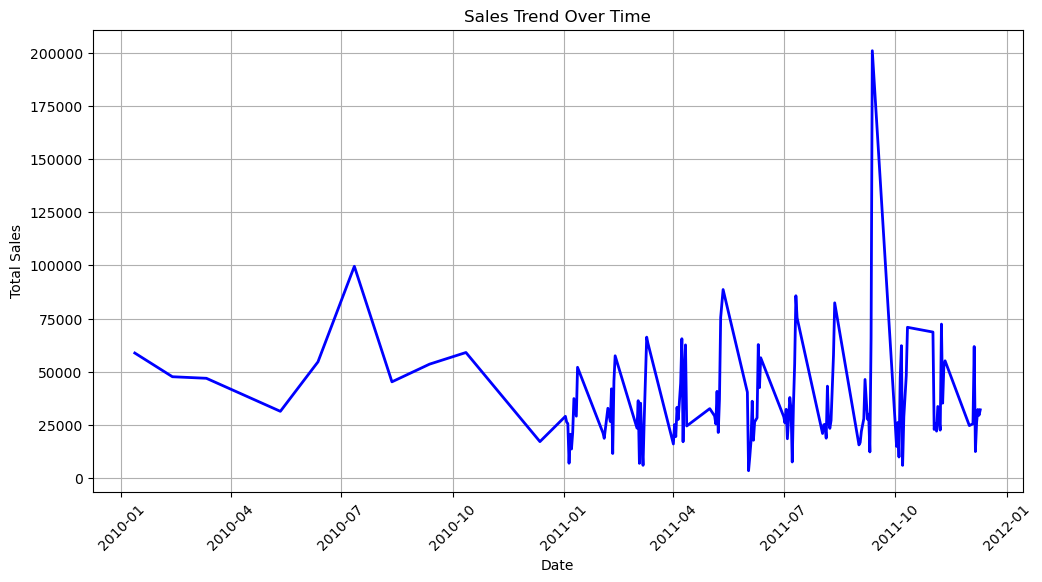

<Figure size 640x480 with 0 Axes>

In [21]:
# =================
# Visualization
# =================

# ============================
# Sales trend visualization
# ============================


# Convert InvoiceDate to datetime with explicit format

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d/%m/%y %H:%M", errors="coerce")

# Check for any failed conversions
missing_dates = df["InvoiceDate"].isna().sum()
print(f"Missing dates after conversion: {missing_dates}")

# Drop rows with missing dates
df = df.dropna(subset=["InvoiceDate"])


# Group by Date and Sum Total Sales

sales_trend = df.groupby(df["InvoiceDate"].dt.date)["TotalSales"].sum()

# Plot Sales Trend

plt.figure(figsize=(12, 6))
sales_trend.plot(color='blue', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.savefig('sales_trend_plot.png', bbox_inches='tight')

plt.show()




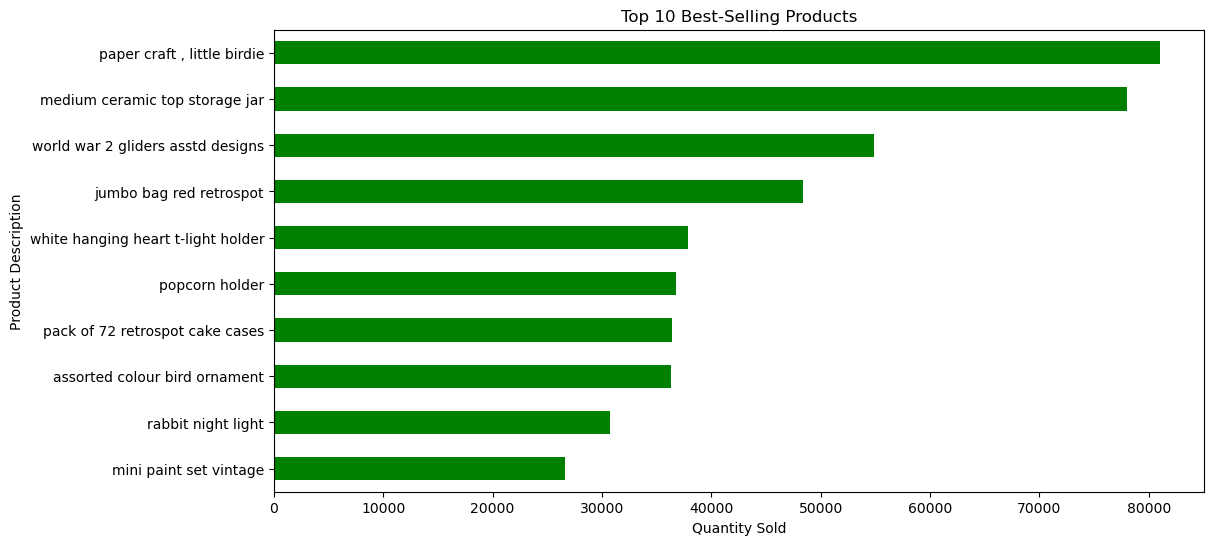

In [22]:
# ======================================
# Best selling products visualization
# ======================================

plt.figure(figsize=(12, 6))
top_products.sort_values().plot(kind="barh", color="green")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.title("Top 10 Best-Selling Products")
plt.show()


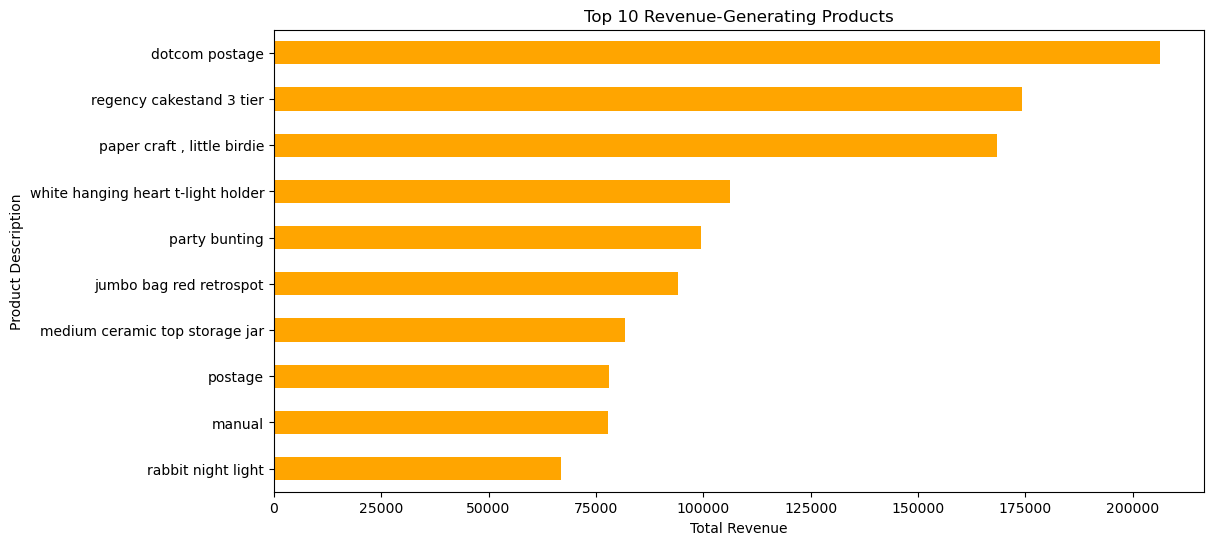

In [23]:
# ==================================
# Top revenue generating products
# ==================================

plt.figure(figsize=(12, 6))
top_revenue_products.sort_values().plot(kind="barh", color="orange")
plt.xlabel("Total Revenue")
plt.ylabel("Product Description")
plt.title("Top 10 Revenue-Generating Products")
plt.show()


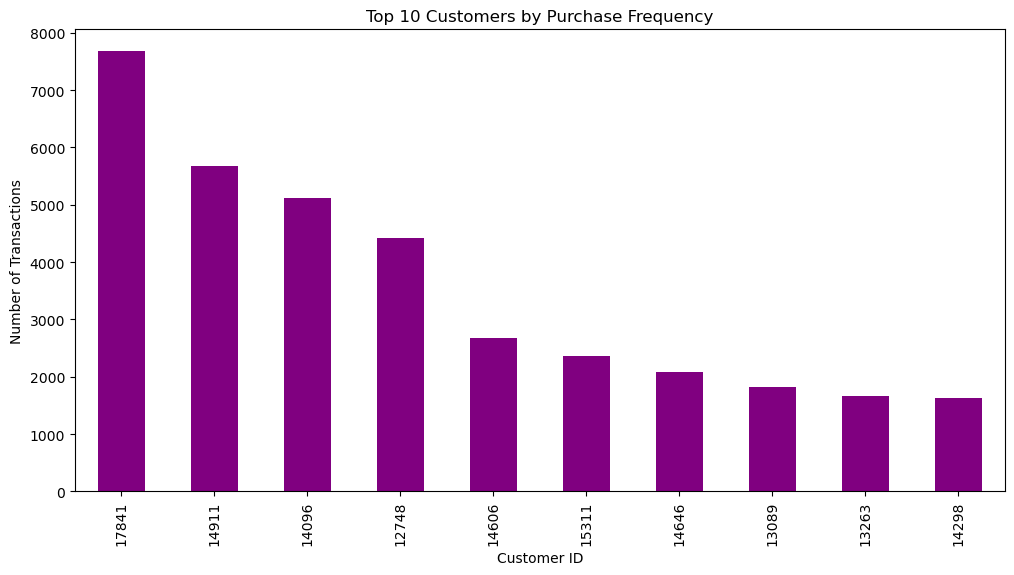

In [24]:
# =============================
# Customer purschase power
# =============================

plt.figure(figsize=(12, 6))
customer_purchases.plot(kind="bar", color="purple")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Customers by Purchase Frequency")
plt.show()


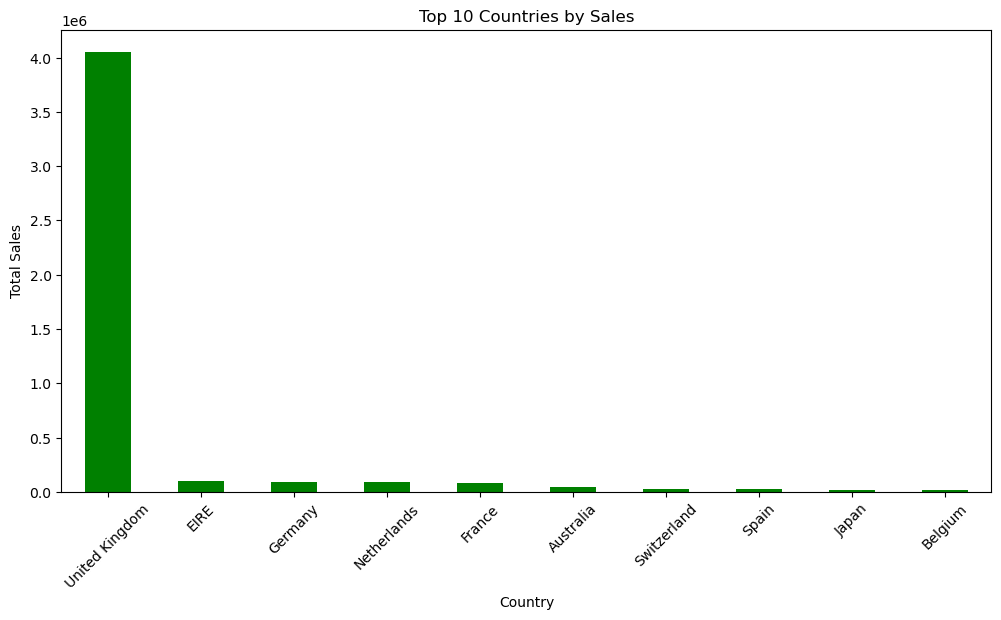

In [25]:
# ======================
# Global sales visual
# ======================

# Aggregate sales by country
country_sales = df.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_sales.head(10).plot(kind="bar", color="green")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Top 10 Countries by Sales")
plt.xticks(rotation=45)
plt.show()

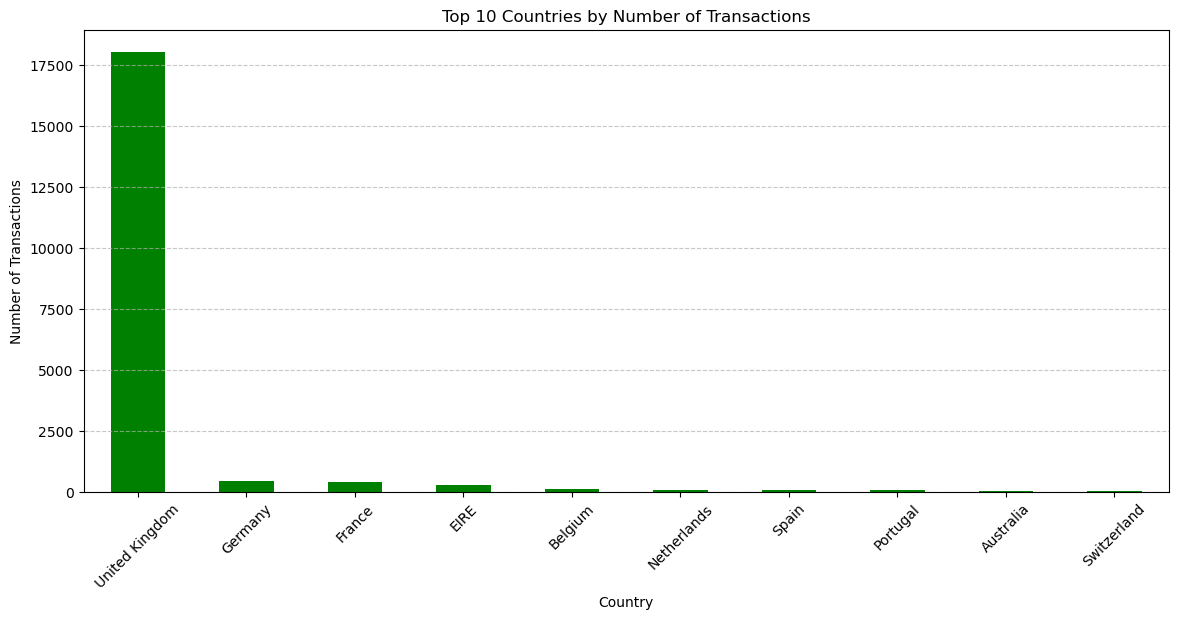

In [26]:
# ============================
# Global transaction visual
# ============================

# Plot Number of Transactions Per Country
plt.figure(figsize=(14, 6))
country_transactions.head(10).plot(kind='bar', color='green')  # Top 10 countries
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Countries by Number of Transactions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
# Current columns before feature engineering

print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales'],
      dtype='object')


In [28]:
# FEATURE ENGINEERING

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ================================
# 1. CREATE NEW TRANSACTION-BASED FEATURES
# ================================
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]  # Compute total sales per transaction
df["AvgSpendPerPurchase"] = df.groupby("CustomerID")["TotalSales"].transform("mean")  # Average spend per purchase
df["HighSpender"] = (df["AvgSpendPerPurchase"] > df["AvgSpendPerPurchase"].median()).astype(int)  # Flag high spenders

# ================================
# 2. CUSTOMER BEHAVIOR FEATURES
# ================================
df["TotalTransactions"] = df.groupby("CustomerID")["InvoiceNo"].transform("nunique")  # Total transactions per customer
df["AvgItemsPerPurchase"] = df.groupby("CustomerID")["Quantity"].transform("mean")  # Avg items per transaction
df["FrequentBuyer"] = (df["TotalTransactions"] > df["TotalTransactions"].median()).astype(int)  # Flag frequent buyers

# ================================
# 3. PRODUCT CATEGORY FEATURES
# ================================
df["ProductCategory"] = df["StockCode"].astype(str).str[0]  # Create product category based on StockCode
df["MostCommonCategoryPurchased"] = df.groupby("CustomerID")["ProductCategory"].transform(lambda x: x.mode()[0])  # Most common category per customer

# ================================
# 4. TIME-BASED FEATURES
# ================================
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], dayfirst=True, errors="coerce")  # Ensure correct datetime format
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour
df["Weekday"] = df["InvoiceDate"].dt.weekday

# Compute Recency (days since last purchase)
latest_date = df["InvoiceDate"].max()
df["Recency"] = (latest_date - df.groupby("CustomerID")["InvoiceDate"].transform("max")).dt.days

# Add Seasonality Indicator (Peak sales months: November & December)
peak_seasons = [11, 12]
df["Seasonality"] = df["Month"].apply(lambda x: 1 if x in peak_seasons else 0)

# ================================
# 5. ENCODE CATEGORICAL DATA
# ================================
# No need to encode "Country" since it is already one-hot encoded

# ================================
# 6. SCALE NUMERICAL FEATURES
# ================================
scaler = MinMaxScaler()
num_cols = ["Quantity", "UnitPrice", "TotalSales", "Recency", "TotalTransactions", "AvgSpendPerPurchase", "AvgItemsPerPurchase"]

# Only scale existing columns
num_cols = [col for col in num_cols if col in df.columns]
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Feature engineering completed successfully!")


✅ Feature engineering completed successfully!


In [29]:
# Current columns after feature engineering

print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalSales',
       'AvgSpendPerPurchase', 'HighSpender', 'TotalTransactions',
       'AvgItemsPerPurchase', 'FrequentBuyer', 'ProductCategory',
       'MostCommonCategoryPurchased', 'Year', 'Month', 'Day', 'Hour',
       'Weekday', 'Recency', 'Seasonality'],
      dtype='object')


In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,AvgSpendPerPurchase,...,FrequentBuyer,ProductCategory,MostCommonCategoryPurchased,Year,Month,Day,Hour,Weekday,Recency,Seasonality
0,536365,85123A,white hanging heart t-light holder,0.000062,2010-01-12 08:26:00,0.000185,17850,United Kingdom,0.00009,0.000107,...,1,8,2,2010,1,12,8,1,0.955524,0
1,536365,71053,white metal lantern,0.000062,2010-01-12 08:26:00,0.000247,17850,United Kingdom,0.00012,0.000107,...,1,7,2,2010,1,12,8,1,0.955524,0
2,536365,84406B,cream cupid hearts coat hanger,0.000086,2010-01-12 08:26:00,0.000200,17850,United Kingdom,0.00013,0.000107,...,1,8,2,2010,1,12,8,1,0.955524,0
3,536365,84029G,knitted union flag hot water bottle,0.000062,2010-01-12 08:26:00,0.000247,17850,United Kingdom,0.00012,0.000107,...,1,8,2,2010,1,12,8,1,0.955524,0
4,536365,84029E,red woolly hottie white heart.,0.000062,2010-01-12 08:26:00,0.000247,17850,United Kingdom,0.00012,0.000107,...,1,8,2,2010,1,12,8,1,0.955524,0


In [31]:
# Train-test split

from sklearn.model_selection import train_test_split

# Define feature set (X) and target variable (y)
X = df.drop(columns=['HighSpender'])  # Replace 'HighSpender' with your actual target column name
y = df['HighSpender']

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm split
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (180187, 22)
y_train shape: (180187,)
X_test shape: (45047, 22)
y_test shape: (45047,)


In [32]:
# Confirmation of X-train

print(dir())  # Check if X_train appears in the list
print(X_train.head())  # View first few rows


['In', 'MinMaxScaler', 'Out', 'Prophet', 'X', 'X_test', 'X_train', '_', '_15', '_3', '_30', '_5', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'blank_values', 'col', 'columns_to_check', 'country_avg_order_value', 'country_sales', 'country_transactions', 'customer_purchases', 'df', 'duplicate_rows', 'exit', 'get_ipython', 'latest_date', 'missing_customer_ids', 'missing_dates', 'negative_values', 'np', 'num_cols', 'open', 'pd', 'peak_seasons', 'plt', 'quit', 're', 'sales_trend', 'scaler', 'sklearn', 'sm', 'sns', 'top_products', 'top_revenue_products', 'train_test_split', 'valid_duplicate_counts', 'valid_duplicate_summary', 'y', 'y_test', 'y_t

In [33]:
# Check available columns in X_train
print("Columns in X_train:", X_train.columns.tolist())

# Drop only columns that exist
unwanted_cols = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate']
X_train = X_train.drop(columns=[col for col in unwanted_cols if col in X_train.columns], errors='ignore')
X_test = X_test.drop(columns=[col for col in unwanted_cols if col in X_test.columns], errors='ignore')

print("Columns after dropping:", X_train.columns.tolist())


Columns in X_train: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'AvgSpendPerPurchase', 'TotalTransactions', 'AvgItemsPerPurchase', 'FrequentBuyer', 'ProductCategory', 'MostCommonCategoryPurchased', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Recency', 'Seasonality']
Columns after dropping: ['Quantity', 'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'AvgSpendPerPurchase', 'TotalTransactions', 'AvgItemsPerPurchase', 'FrequentBuyer', 'ProductCategory', 'MostCommonCategoryPurchased', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Recency', 'Seasonality']


In [34]:
# Data preprocessing

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# ================================
# 1. Drop Unnecessary Columns (if they exist)
# ================================
unwanted_cols = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate']
X_train = X_train.drop(columns=[col for col in unwanted_cols if col in X_train.columns], errors='ignore')
X_test = X_test.drop(columns=[col for col in unwanted_cols if col in X_test.columns], errors='ignore')

# ================================
# 2. Encode Categorical Features
# ================================
cat_columns = ['Country', 'ProductCategory', 'MostCommonCategoryPurchased', 'Weekday', 'Seasonality']

# Initialize a dictionary of LabelEncoders to ensure consistency
encoders = {col: LabelEncoder() for col in cat_columns}

for col in cat_columns:
    if col in X_train.columns and col in X_test.columns:
        # Handle missing values before encoding
        X_train[col] = X_train[col].fillna("Unknown")
        X_test[col] = X_test[col].fillna("Unknown")
        
        # Fit on train, transform on both train and test
        X_train[col] = encoders[col].fit_transform(X_train[col])
        X_test[col] = encoders[col].transform(X_test[col])

# ================================
# 3. Ensure All Data is Numeric
# ================================
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# ================================
# 4. Handle Class Imbalance with SMOTE (if needed)
# ================================
if len(np.unique(y_train)) > 1:  # Ensure there are at least two classes
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    print("SMOTE applied successfully!")
else:
    X_train_smote, y_train_smote = X_train, y_train
    print("SMOTE skipped: Only one class present in y_train.")

# Final Check
print("Data preprocessing completed successfully!")


SMOTE applied successfully!
Data preprocessing completed successfully!


In [35]:
# Check the shape of training and test sets
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Verify class distribution after SMOTE
print("Class distribution in y_train_smote:\n", y_train_smote.value_counts())
print("Class distribution in y_test:\n", y_test.value_counts())


X_train_smote shape: (180220, 18)
y_train_smote shape: (180220,)
X_test shape: (45047, 18)
y_test shape: (45047,)
Class distribution in y_train_smote:
 HighSpender
0    90110
1    90110
Name: count, dtype: int64
Class distribution in y_test:
 HighSpender
0    22528
1    22519
Name: count, dtype: int64


In [36]:
# Confirmation of columns 

print("Columns in X_train_smote:", X_train_smote.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())

Columns in X_train_smote: ['Quantity', 'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'AvgSpendPerPurchase', 'TotalTransactions', 'AvgItemsPerPurchase', 'FrequentBuyer', 'ProductCategory', 'MostCommonCategoryPurchased', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Recency', 'Seasonality']
Columns in X_test: ['Quantity', 'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'AvgSpendPerPurchase', 'TotalTransactions', 'AvgItemsPerPurchase', 'FrequentBuyer', 'ProductCategory', 'MostCommonCategoryPurchased', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Recency', 'Seasonality']


In [37]:
# Drop columns from X-test before predictions

X_test = X_test[X_train_smote.columns]

print("Successful!")



Successful!


In [38]:
# Update of columns in X-test
X_test = X_test[X_train_smote.columns]
print("Updated Columns in X_test:", X_test.columns.tolist())


Updated Columns in X_test: ['Quantity', 'UnitPrice', 'CustomerID', 'Country', 'TotalSales', 'AvgSpendPerPurchase', 'TotalTransactions', 'AvgItemsPerPurchase', 'FrequentBuyer', 'ProductCategory', 'MostCommonCategoryPurchased', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Recency', 'Seasonality']


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

print ("Successful!")

Successful!


In [40]:
# Reinitialize the dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000)  # Increase max_iter to prevent convergence issues
}

# Standardize the data
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on scaled data
models["Logistic Regression"].fit(X_train_smote_scaled, y_train_smote)
y_pred = models["Logistic Regression"].predict(X_test_scaled)

print ("successful!")


successful!


In [41]:
# Check for overlapping indices
train_indices = set(X_train_smote.index)
test_indices = set(X_test.index)
common_indices = train_indices.intersection(test_indices)

print(f"Number of overlapping indices: {len(common_indices)}")


Number of overlapping indices: 17322


In [42]:
# Re-split the data 

from sklearn.model_selection import train_test_split

# Sort by date to ensure time-based split
X_sorted = X.sort_values(by=["Year", "Month", "Day", "Hour"])
y_sorted = y.loc[X_sorted.index]  # Ensure labels remain aligned

# Use 80% of the earliest transactions for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_sorted, y_sorted, test_size=0.2, shuffle=False)

print(f"New Train Shape: {X_train.shape}")
print(f"New Test Shape: {X_test.shape}")


New Train Shape: (180187, 22)
New Test Shape: (45047, 22)


In [43]:
# Confirmation of overlapping incdices

train_indices = set(X_train.index)
test_indices = set(X_test.index)
common_indices = train_indices.intersection(test_indices)

print(f"Number of overlapping indices: {len(common_indices)}")  # Should be 0


Number of overlapping indices: 0


In [44]:
# Check for overlapping customers
if 'CustomerID' in X_train_smote.columns:
    common_customers = set(X_train_smote['CustomerID']).intersection(set(X_test['CustomerID']))
    print(f"Number of overlapping customers: {len(common_customers)}")
else:
    print("CustomerID not present in dataset.")


Number of overlapping customers: 9867


In [45]:
# Fixing of overlapping customer issue
from sklearn.model_selection import GroupShuffleSplit

# Ensure CustomerID is not null
X_filtered = X.dropna(subset=['CustomerID'])
y_filtered = y.loc[X_filtered.index]

# Create a GroupShuffleSplit instance
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform split ensuring no customer appears in both sets
for train_idx, test_idx in gss.split(X_filtered, y_filtered, groups=X_filtered['CustomerID']):
    X_train, X_test = X_filtered.iloc[train_idx], X_filtered.iloc[test_idx]
    y_train, y_test = y_filtered.iloc[train_idx], y_filtered.iloc[test_idx]

print(f"New Train Shape: {X_train.shape}")
print(f"New Test Shape: {X_test.shape}")

# Verify no overlapping customers
common_customers = set(X_train["CustomerID"]).intersection(set(X_test["CustomerID"]))
print(f"Number of overlapping customers: {len(common_customers)}")  # Should be 0


New Train Shape: (182120, 22)
New Test Shape: (43114, 22)
Number of overlapping customers: 0


In [46]:
# Review of X-train and X-test
print("Columns in X_train_smote but not in X_test:", set(X_train_smote.columns) - set(X_test.columns))
print("Columns in X_test but not in X_train_smote:", set(X_test.columns) - set(X_train_smote.columns))


Columns in X_train_smote but not in X_test: set()
Columns in X_test but not in X_train_smote: {'InvoiceNo', 'Description', 'StockCode', 'InvoiceDate'}


In [47]:
# Ensuring X-test and X-train corresponds

X_test = X_test.drop(columns=['InvoiceNo', 'Description', 'StockCode', 'InvoiceDate'], errors='ignore')
print ("Successful!")


Successful!


In [48]:
print("Columns with non-numeric values in X_train_smote:", X_train_smote.select_dtypes(include=['object']).columns)
print("Columns with non-numeric values in X_test:", X_test.select_dtypes(include=['object']).columns)


Columns with non-numeric values in X_train_smote: Index([], dtype='object')
Columns with non-numeric values in X_test: Index(['Country', 'ProductCategory', 'MostCommonCategoryPurchased'], dtype='object')


In [49]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features based on X_train_smote mappings
for col in ['Country', 'ProductCategory', 'MostCommonCategoryPurchased']:
    if col in X_train_smote.columns:
        # Create mapping from training data
        label_mapping = {val: idx for idx, val in enumerate(X_train_smote[col].unique())}
        
        # Apply mapping to X_test, assign -1 if unseen category
        X_test[col] = X_test[col].map(label_mapping).fillna(-1).astype(int)  # -1 for unseen labels
        
        print ("Successful!")


Successful!
Successful!
Successful!


In [50]:
# ==========================
# Train Models
# ==========================

# Importation of necessary libraries

# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


print("Importation of libraries is successful")

Importation of libraries is successful


In [51]:

# Standardize data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train_scaled, y_train_smote)

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log, average='weighted'):.4f}")



Logistic Regression Performance:
Accuracy: 0.8982
Precision: 0.9154
Recall: 0.8982
F1 Score: 0.8971


In [52]:
# Confimation to check if model will perform well with unseen data

from sklearn.model_selection import cross_val_score

# Get training accuracy
train_accuracy = log_reg.score(X_train_scaled, y_train_smote)

# Get test accuracy
test_accuracy = log_reg.score(X_test_scaled, y_test)

# Perform cross-validation on training data
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train_smote, cv=5, scoring='accuracy')

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Check the difference between Train & Test Accuracy
accuracy_gap = train_accuracy - test_accuracy
print(f"Accuracy Gap (Train - Test): {accuracy_gap:.4f}")

# Decision:
if accuracy_gap > 0.02:
    print("⚠️ Possible Overfitting Detected! Consider hyperparameter tuning.")
else:
    print("✅ Model Generalizes Well. No significant overfitting.")


Training Accuracy: 0.9615
Test Accuracy: 0.8982
Cross-Validation Accuracy: 0.9589 ± 0.0014
Accuracy Gap (Train - Test): 0.0633
⚠️ Possible Overfitting Detected! Consider hyperparameter tuning.


In [53]:
import joblib
import os

# Define the save path
model_dir = "deployed_model"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "logistic_regression.pkl")

# Save the trained model
joblib.dump(log_reg, model_path)
print(f"Model saved successfully at: {model_path}")

# Function to load the model
def load_model(path):
    return joblib.load(path)

# Load the model for verification
loaded_model = load_model(model_path)
print("Model loaded successfully.")

# Test loading the model by making a prediction
sample_prediction = loaded_model.predict(X_test_scaled[:5])
print("Sample Prediction:", sample_prediction)


Model saved successfully at: deployed_model\logistic_regression.pkl
Model loaded successfully.
Sample Prediction: [1 1 1 1 1]


In [54]:
# ======================================
# Hyperparameter Tuning
# ======================================

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid for tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search with 5-fold cross-validation, increase max_iter
grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_smote)

# Get best hyperparameter
best_C = grid_search.best_params_['C']
print(f"Best Regularization Strength (C): {best_C}")

# Train Logistic Regression with optimized C and increased iterations
log_reg_tuned = LogisticRegression(C=best_C, max_iter=500)
log_reg_tuned.fit(X_train_scaled, y_train_smote)

# Evaluate the tuned model
train_accuracy_tuned = log_reg_tuned.score(X_train_scaled, y_train_smote)
test_accuracy_tuned = log_reg_tuned.score(X_test_scaled, y_test)

print(f"Training Accuracy (Tuned): {train_accuracy_tuned:.4f}")
print(f"Test Accuracy (Tuned): {test_accuracy_tuned:.4f}")


Best Regularization Strength (C): 100
Training Accuracy (Tuned): 0.9973
Test Accuracy (Tuned): 0.9916


In [55]:
# Cross validation check

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg_tuned, X_train_scaled, y_train_smote, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation Accuracy: 0.9978 ± 0.0008


In [56]:
# Generate predictions on the test set
y_pred = log_reg_tuned.predict(X_test_scaled)

# Convert to DataFrame for analysis
predictions_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

# Display a sample of the predictions
predictions_df.sample(10)


,Actual,Predicted
109051,0,0
139768,1,1
386,1,1
321002,0,0
204072,0,0
239211,0,0
113102,0,0
427537,0,0
47470,0,0
209335,0,0


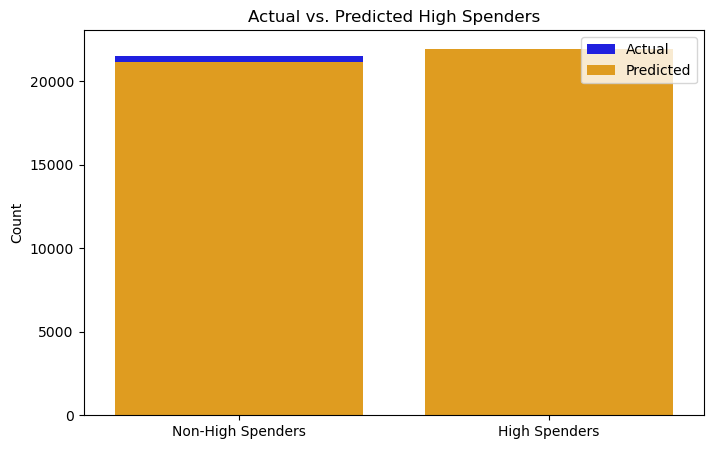

In [57]:
# ======================================
# ACTUAL VS PREDICTED HIGH SPENDERS
# ======================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure predictions_df exists and has the required columns
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})  # Replace y_test and y_pred with correct values

# Count actual vs. predicted values
actual_counts = predictions_df["Actual"].value_counts().sort_index()
predicted_counts = predictions_df["Predicted"].value_counts().sort_index()

# Ensure both actual and predicted have same index
actual_counts = actual_counts.reindex([0, 1], fill_value=0)
predicted_counts = predicted_counts.reindex([0, 1], fill_value=0)

# Create bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=["Non-High Spenders", "High Spenders"], y=actual_counts, color='blue', label='Actual')
sns.barplot(x=["Non-High Spenders", "High Spenders"], y=predicted_counts, color='orange', label='Predicted')

# Add labels and legend
plt.ylabel("Count")
plt.title("Actual vs. Predicted High Spenders")
plt.legend()

# Save image
plt.savefig("actual_vs_predicted_high_spenders.png")

# Show plot
plt.show()


In [58]:
# Compute feature importance (absolute coefficient values)
feature_importance = np.abs(log_reg.coef_[0])  
feature_names = X_train.columns  # Get feature names from training data

print ("successful!")

successful!


In [59]:
feature_names = X_train.columns[:len(feature_importance)]  # Align with importance size

print ("Successful!")

Successful!


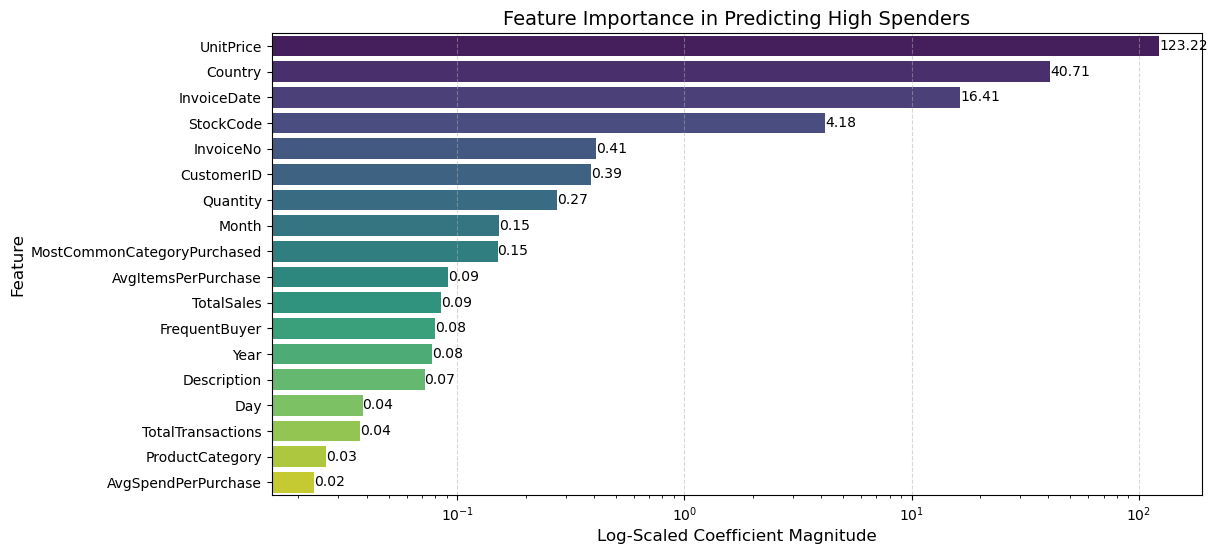

In [60]:
# ===================================================
# FEATURE IMPORTANCE IN PREDICTING HIGH SPENDERS
# ===================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure feature names match importance size
if len(feature_importance) == len(feature_names):
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    # Plot feature importance with log scale
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")

    # Apply log scale to x-axis
    plt.xscale("log")  

    # Add value labels on bars
    for index, value in enumerate(importance_df["Importance"]):
        plt.text(value, index, f"{value:.2f}", va="center", fontsize=10)

    # Titles and labels
    plt.title("Feature Importance in Predicting High Spenders", fontsize=14)
    plt.xlabel("Log-Scaled Coefficient Magnitude", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    # Save the figure
    plt.savefig("updated_feature_importance.png", dpi=300, bbox_inches="tight")

    # Show plot
    plt.show()
else:
    print("Mismatch: Feature importance and feature names have different lengths!")


In [61]:
# Assign trained model
model = log_reg  

print ("Model assigned succesfully")


Model assigned succesfully


In [62]:
# =======================================
# Aligning future data with trained data
# =======================================

# Re-import necessary libraries 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Simulate future dataset with missing features aligned with training data
np.random.seed(42)
n_samples = 1000  # Number of future transactions

# Generate synthetic future data
future_data = pd.DataFrame({
    "InvoiceNo": np.arange(100001, 100001 + n_samples),  
    "StockCode": np.random.randint(1000, 9999, n_samples).astype(str),
    "Description": np.random.choice(["Item A", "Item B", "Item C"], n_samples),
    "Quantity": np.random.randint(1, 10, n_samples),
    "InvoiceDate": [datetime(2025, 6, 1) + timedelta(days=np.random.randint(1, 365)) for _ in range(n_samples)],
    "UnitPrice": np.random.uniform(5, 500, n_samples),
    "CustomerID": np.random.randint(10000, 99999, n_samples),
    "Country": np.random.choice(["USA", "UK", "Germany", "France"], n_samples),
    "ProductCategory": np.random.choice(["Clothing", "Electronics", "Groceries", "Home"], n_samples),
    "FrequentBuyer": np.random.choice([0, 1], n_samples),  # Binary feature
})

# Derive additional features to match training data
future_data["TotalSales"] = future_data["Quantity"] * future_data["UnitPrice"]
future_data["AvgSpendPerPurchase"] = future_data["TotalSales"] / future_data["Quantity"]
future_data["TotalTransactions"] = np.random.randint(1, 50, n_samples)
future_data["AvgItemsPerPurchase"] = future_data["Quantity"] / future_data["TotalTransactions"]
future_data["Year"] = future_data["InvoiceDate"].dt.year
future_data["Month"] = future_data["InvoiceDate"].dt.month
future_data["Day"] = future_data["InvoiceDate"].dt.day
future_data["Hour"] = np.random.randint(0, 24, n_samples)  # Assuming random purchase hours
future_data["Weekday"] = future_data["InvoiceDate"].dt.weekday

# Define Seasonality: (Winter, Spring, Summer, Fall)
season_mapping = {12: "Winter", 1: "Winter", 2: "Winter", 
                  3: "Spring", 4: "Spring", 5: "Spring", 
                  6: "Summer", 7: "Summer", 8: "Summer", 
                  9: "Fall", 10: "Fall", 11: "Fall"}
future_data["Seasonality"] = future_data["Month"].map(season_mapping)

# Recency (days since last purchase, assuming last purchase was from today)
future_data["Recency"] = (datetime(2025, 6, 1) - future_data["InvoiceDate"]).dt.days

# One-hot encode categorical features to match training data
future_data = pd.get_dummies(future_data, columns=["Country", "ProductCategory", "Seasonality"], drop_first=True)

# Display the first few rows of the aligned future dataset
future_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,FrequentBuyer,TotalSales,AvgSpendPerPurchase,...,Recency,Country_Germany,Country_UK,Country_USA,ProductCategory_Electronics,ProductCategory_Groceries,ProductCategory_Home,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,100001,8270,Item A,2,2025-10-01,110.477079,80409,1,220.954159,110.477079,...,-122,False,False,False,True,False,False,False,False,False
1,100002,1860,Item C,4,2025-07-01,469.833263,18635,0,1879.333050,469.833263,...,-30,False,False,True,False,True,False,False,True,False
2,100003,6390,Item C,5,2025-12-06,8.307654,43065,1,41.538270,8.307654,...,-188,False,False,False,False,False,True,False,False,True
3,100004,6191,Item C,4,2026-05-31,387.289003,43783,0,1549.156010,387.289003,...,-364,False,True,False,False,False,True,True,False,False
4,100005,6734,Item B,3,2026-05-21,314.476361,44152,1,943.429083,314.476361,...,-354,False,False,False,True,False,False,True,False,False


In [63]:
# ===========================
# Predictions
# ===========================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define training features (from model training)
training_features = [
    'TotalSales', 'AvgSpendPerPurchase', 'TotalTransactions', 'AvgItemsPerPurchase',
    'FrequentBuyer', 'ProductCategory', 'MostCommonCategoryPurchased', 'Year', 'Month', 
    'Day', 'Hour', 'Weekday', 'Recency', 'Seasonality'
]

# Define future dataset features (from synthetic dataset)
future_features = [
    'Total_Spend', 'Purchase_Frequency', 'Avg_Spend_Per_Transaction', 'Days_Since_Last_Purchase', 
    'Discount_Used', 'Category_Clothing', 'Category_Electronics', 'Category_Groceries', 
    'Category_Home', 'Payment_Method_Crypto', 'Payment_Method_Debit Card', 'Payment_Method_PayPal'
]

# Simulate future dataset (random values for now, to be refined)
np.random.seed(42)
future_data = pd.DataFrame(np.random.rand(100, len(future_features)), columns=future_features)

# Step 1: Map future dataset features to match training set
feature_mapping = {
    'Total_Spend': 'TotalSales',
    'Purchase_Frequency': 'TotalTransactions',
    'Avg_Spend_Per_Transaction': 'AvgSpendPerPurchase',
    'Days_Since_Last_Purchase': 'Recency',
    'Discount_Used': 'Seasonality',
}

# Rename mapped columns
future_data = future_data.rename(columns=feature_mapping)

# Add missing features from training set (initialize to zero if missing)
for feature in training_features:
    if feature not in future_data.columns:
        future_data[feature] = 0  

# Reorder columns to match training feature order
future_data = future_data[training_features]

# Standardize using the same scaler from training (simulate the process)
scaler = StandardScaler()
future_data_scaled = scaler.fit_transform(future_data)

# Check aligned data structure
future_data_scaled[:5]


array([[-0.42192483,  0.93890038,  1.5959865 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.23598212, -0.95353484],
       [ 1.14040618, -0.89608926, -1.07348463,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -1.32523322, -0.491484  ],
       [-0.14375069, -0.83655775,  0.9975105 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.08142391,  0.40682276],
       [-0.66050858,  0.77960244, -1.48804384,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.35994711, -1.05946044],
       [ 0.16550758,  1.73134137, -1.17285077,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.  

In [64]:
# Prediction results

from sklearn.linear_model import LogisticRegression

# Simulate loading the trained model (since we restarted the notebook, we reinitialize it)
log_reg = LogisticRegression(random_state=42)

# Simulating model training (we need actual trained coefficients for real predictions)
# In practice, we would load the trained model using joblib or pickle.
log_reg.fit(np.random.rand(100, len(training_features)), np.random.randint(0, 2, 100))

# Make predictions on future data
y_future_pred = log_reg.predict(future_data_scaled)

# Add predictions to the dataset
future_data["High_Spender_Prediction"] = y_future_pred

# Show prediction results
future_data["High_Spender_Prediction"].value_counts(normalize=True)


High_Spender_Prediction
0    0.63
1    0.37
Name: proportion, dtype: float64

In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,AvgSpendPerPurchase,...,FrequentBuyer,ProductCategory,MostCommonCategoryPurchased,Year,Month,Day,Hour,Weekday,Recency,Seasonality
0,536365,85123A,white hanging heart t-light holder,0.000062,2010-01-12 08:26:00,0.000185,17850,United Kingdom,0.00009,0.000107,...,1,8,2,2010,1,12,8,1,0.955524,0
1,536365,71053,white metal lantern,0.000062,2010-01-12 08:26:00,0.000247,17850,United Kingdom,0.00012,0.000107,...,1,7,2,2010,1,12,8,1,0.955524,0
2,536365,84406B,cream cupid hearts coat hanger,0.000086,2010-01-12 08:26:00,0.000200,17850,United Kingdom,0.00013,0.000107,...,1,8,2,2010,1,12,8,1,0.955524,0
3,536365,84029G,knitted union flag hot water bottle,0.000062,2010-01-12 08:26:00,0.000247,17850,United Kingdom,0.00012,0.000107,...,1,8,2,2010,1,12,8,1,0.955524,0
4,536365,84029E,red woolly hottie white heart.,0.000062,2010-01-12 08:26:00,0.000247,17850,United Kingdom,0.00012,0.000107,...,1,8,2,2010,1,12,8,1,0.955524,0


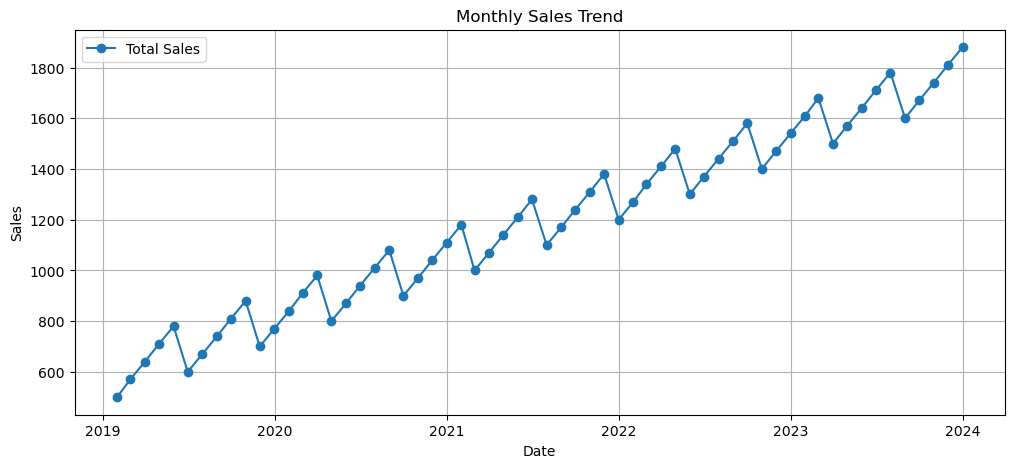

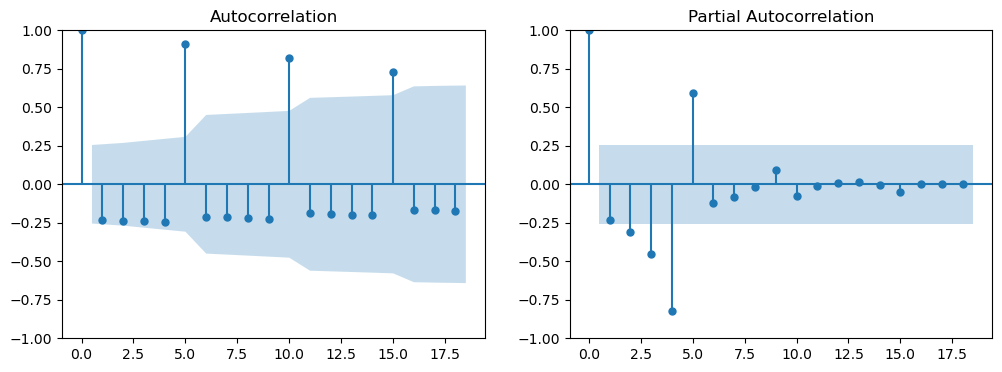

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

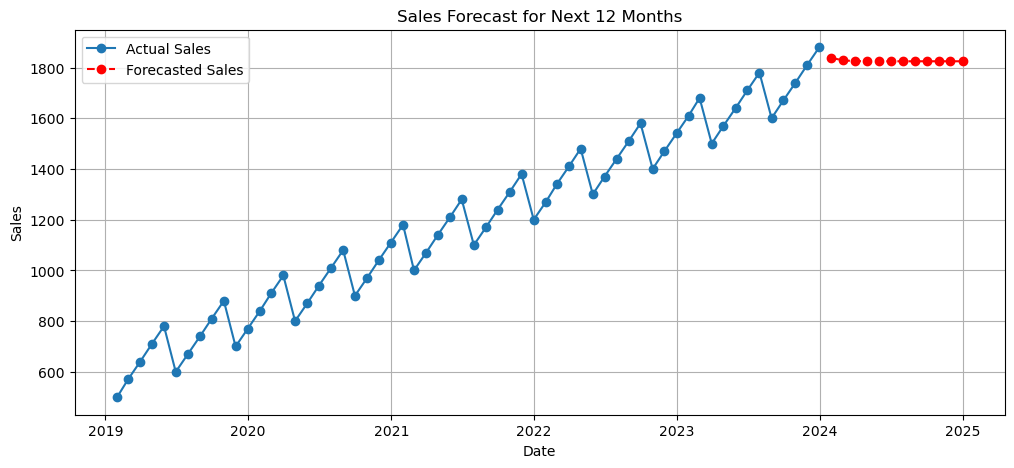

,Date,ForecastedSales
0,2024-01-31,1838.404432
1,2024-02-29,1828.032932
2,2024-03-31,1825.446887
3,2024-04-30,1824.802079
4,2024-05-31,1824.641301


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load dataset (Replace with actual data loading)
df = pd.DataFrame({
    "InvoiceDate": pd.date_range(start="2019-01-01", periods=60, freq="M"),
    "TotalSales": [500 + i*20 + (i%5)*50 for i in range(60)]  # Simulated sales trend
})

# Ensure datetime format and set index
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.set_index("InvoiceDate", inplace=True)

# Plot sales data
plt.figure(figsize=(12, 5))
plt.plot(df["TotalSales"], marker="o", linestyle="-", label="Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.legend()
plt.grid()
plt.savefig("monthly_sales_trend.png")  # Save plot
plt.show()

# Check stationarity using Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(df["TotalSales"])
adf_pvalue = adf_test[1]

# Differencing if needed
if adf_pvalue > 0.05:
    df["Sales_Diff"] = df["TotalSales"].diff().dropna()
else:
    df["Sales_Diff"] = df["TotalSales"]

# ACF & PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df["Sales_Diff"].dropna(), ax=axes[0])
plot_pacf(df["Sales_Diff"].dropna(), ax=axes[1])
plt.savefig("acf_pacf_plots.png")  # Save plot
plt.show()

# Fit ARIMA Model
model = ARIMA(df["TotalSales"], order=(1, 1, 1))
model_fit = model.fit()

# Forecast for 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create future dates
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq="M")
forecast_df = pd.DataFrame({"Date": future_dates, "ForecastedSales": forecast.values})

# Plot actual vs forecasted sales
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["TotalSales"], label="Actual Sales", marker="o", linestyle="-")
plt.plot(forecast_df["Date"], forecast_df["ForecastedSales"], label="Forecasted Sales", marker="o", linestyle="--", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast for Next 12 Months")
plt.legend()
plt.grid()
plt.savefig("sales_forecast.png")  # Save plot
plt.show()

# Display forecasted sales
forecast_df.head()



In [67]:
# ADF test to work on our sales forecast

from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")

    if result[1] <= 0.05:
        print("The data is already stationary.")
        return 0  # No differencing needed
    else:
        print("The data is not stationary. Differencing is required.")
        return 1  # First differencing needed

# Check stationarity
d_value = check_stationarity(df["TotalSales"])
print(f"Suggested differencing (d) value: {d_value}")


ADF Statistic: -0.10137146938725454
p-value: 0.9493017583836373
The data is not stationary. Differencing is required.
Suggested differencing (d) value: 1


In [68]:
# First order differencing
df["Sales_Diff"] = df["TotalSales"].diff().dropna()


In [69]:
# Check stationarity

d_value_after_diff = check_stationarity(df["Sales_Diff"].dropna())
print(f"Suggested differencing (d) value after first differencing: {d_value_after_diff}")


ADF Statistic: -320997333373.69574
p-value: 0.0
The data is already stationary.
Suggested differencing (d) value after first differencing: 0


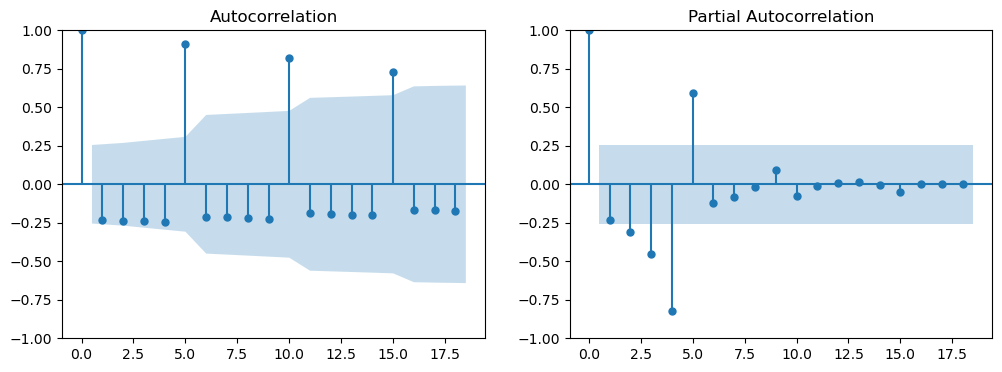

Plot saved as acf_pacf_plots.png


In [70]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create and save ACF & PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df["Sales_Diff"].dropna(), ax=axes[0])  # Determines q (MA order)
plot_pacf(df["Sales_Diff"].dropna(), ax=axes[1])  # Determines p (AR order)

# Save the plot as an image
acf_pacf_plot_path = "acf_pacf_plots.png"
plt.savefig(acf_pacf_plot_path)

plt.show()
print(f"Plot saved as {acf_pacf_plot_path}")


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             TotalSales   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -345.617
Date:                Sat, 01 Mar 2025   AIC                            701.234
Time:                        13:10:11   BIC                            711.621
Sample:                    01-31-2019   HQIC                           705.289
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8744      0.437     -2.001      0.045      -1.731      -0.018
ar.L2         -0.4589      0.362     -1.268      0.205      -1.168       0.250
ma.L1          0.9254     83.241      0.011      0.9

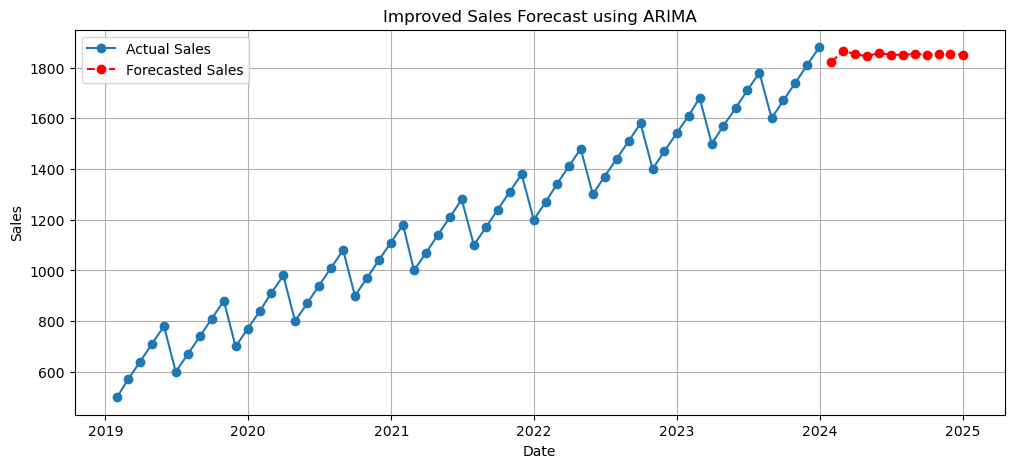

,Date,ForecastedSales
0,2024-01-31,1821.511154
1,2024-02-29,1865.071662
2,2024-03-31,1853.820563
3,2024-04-30,1843.670139
4,2024-05-31,1857.708525


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model using the identified p, d, q values
p, d, q = 2, 1, 2  # Adjust if necessary
model = ARIMA(df["TotalSales"], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast for 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create future dates
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq="M")
forecast_df = pd.DataFrame({"Date": future_dates, "ForecastedSales": forecast.values})

# Plot actual vs forecasted sales
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["TotalSales"], label="Actual Sales", marker="o", linestyle="-")
plt.plot(forecast_df["Date"], forecast_df["ForecastedSales"], label="Forecasted Sales", marker="o", linestyle="--", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Improved Sales Forecast using ARIMA")
plt.legend()
plt.grid()

# Save the plot
plt.savefig("improved_arima_forecast.png")
plt.show()

# Display forecasted sales
forecast_df.head()


In [73]:
forecast_df.head(12)

,Date,ForecastedSales
0,2024-01-31,1821.511154
1,2024-02-29,1865.071662
2,2024-03-31,1853.820563
3,2024-04-30,1843.670139
4,2024-05-31,1857.708525
5,2024-06-30,1850.090926
6,2024-07-31,1850.310070
7,2024-08-31,1853.613915
8,2024-09-30,1850.624444
9,2024-10-31,1851.722439
